In [136]:
# For data analysis
import os
# import squeak
import numpy as np
from traj_util import mouseData

# For plotting
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager

In [137]:
%config InlineBackend.figure_formats = ["svg"]
# chinese in figure
font_manager.fontManager.addfont(os.path.join("..", "assets", "Helvetica.ttf"))
# minus in figure
plt.rcParams["axes.unicode_minus"]=False
# other style
plt.rcParams["font.family"] = "Helvetica"
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

In [138]:
# set path
tmp_beh_path = os.path.join("..", "data", "beh_data")
figure_path = os.path.join("..", "figures")
# set task name
foodtask = "foodchoice"
wordtask = "wordchoice"
imagetask = "imagechoice"

## foodchoice (Fig. 4e left)

In [139]:
food_df = mouseData(tmp_beh_path, foodtask)
food_df.preprocess()

In [140]:
# subject level x, y
food_nxy = food_df.data.groupby(["sub"])[["nx", "ny"]].agg([np.mean]).reset_index().droplevel(1, axis=1)

<Figure size 360x360 with 0 Axes>

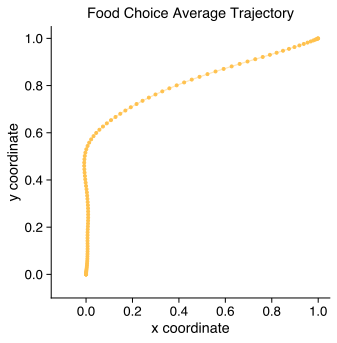

In [141]:
# plot subject level average trajectory
sns.set_context("paper", font_scale=1.5)
plt.figure(figsize=(5, 5))
plt.subplots(figsize=(5, 5))
plt.plot(np.mean(food_nxy["nx"]), np.mean(food_nxy["ny"]), "-o", color="#FFE6B8", markersize=3, markeredgecolor="#FFC14D", markerfacecolor="#FFC14D")
plt.title("Food Choice Average Trajectory", y=1.01)
plt.xlim((-.15, 1.05))
plt.ylim((-.1, 1.05))
plt.xlabel("x coordinate")
plt.ylabel("y coordinate")
plt.savefig(os.path.join(figure_path, foodtask, "averge_trajectory.svg"), bbox_inches="tight")

## imageChoice (Fig. 4e center)

In [145]:
image_df = mouseData(tmp_beh_path, imagetask)
image_df.preprocess()
# image_df.cal_metrics()

In [146]:
# get subject level xy trajectory for each condition
tmp_df = image_df.data.groupby(["sub", "animacy"])[["nx", "ny"]].agg([np.mean]).reset_index().droplevel(1, axis=1)
image_nxy = tmp_df.pivot(index="sub", columns="animacy", values=["nx", "ny"]).reset_index()
image_nxy.columns = ["".join(pair) for pair in image_nxy.columns]

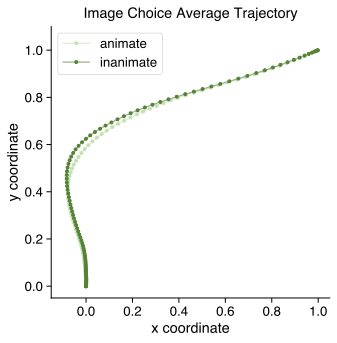

In [150]:
# plot subject level average trajectory for each condition
sns.set_context("paper", font_scale=1.5)
plt.figure(figsize=(5, 5))
plt.plot(np.mean(image_nxy["nxanimate"]), np.mean(image_nxy["nyanimate"]), "-o", color="#DDE9D6", label="animate", markersize=3, markeredgecolor="#C5E0B4", markerfacecolor="#C5E0B4")
plt.plot(np.mean(image_nxy["nxinanimate"]), np.mean(image_nxy["nyinanimate"]), "-o", color="#9AAE8C", label="inanimate", markersize=3, markeredgecolor="#548235", markerfacecolor="#548235")
plt.legend(loc="upper left")
plt.title("Image Choice Average Trajectory", y=1.01)
plt.xlim((-.15, 1.05))
plt.ylim((-.05, 1.1))
plt.xlabel("x coordinate")
plt.ylabel("y coordinate")
plt.savefig(os.path.join(figure_path, imagetask, "averge_trajectory.svg"), bbox_inches="tight")

## wordchoice (Fig. 4e right)

In [ ]:
word_df = mouseData(tmp_beh_path, wordtask)
word_df.preprocess()

In [ ]:
# get subject level xy trajectory for each condition
tmp_df = word_df.data.groupby(["sub", "animacy"])[["nx", "ny"]].agg([np.mean]).reset_index().droplevel(1, axis=1)
word_nxy = tmp_df.pivot(index="sub", columns="animacy", values=["nx", "ny"]).reset_index()
word_nxy.columns = ["".join(pair) for pair in word_nxy.columns]

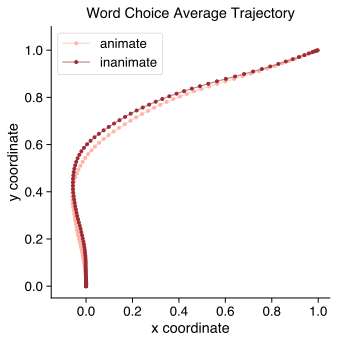

In [ ]:
# plot subject level average trajectory for each condition
sns.set_context("paper", font_scale=1.5)
plt.figure(figsize=(5, 5))
plt.plot(np.mean(word_nxy["nxanimate"]), np.mean(word_nxy["nyanimate"]), "-o", color="#F8D6D1", label="animate", markersize=3, markeredgecolor="#FFB3A7", markerfacecolor="#FFB3A7")
plt.plot(np.mean(word_nxy["nxinanimate"]), np.mean(word_nxy["nyinanimate"]), "-o", color="#BB888C", label="inanimate", markersize=3, markeredgecolor="#9D2933", markerfacecolor="#9D2933")
plt.legend(loc="upper left")
plt.title("Word Choice Average Trajectory", y=1.01)
plt.xlim((-.15, 1.05))
plt.ylim((-.05, 1.1))
plt.xlabel("x coordinate")
plt.ylabel("y coordinate")
plt.savefig(os.path.join(figure_path, wordtask, "averge_trajectory.svg"), bbox_inches="tight")